In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE

import env
import wrangle
import os

# turn off warning boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
# change display settings to show all columns
pd.set_option("display.max_columns", None)

In [3]:
# acquire the data
df = wrangle.get_zillow_data()

Using cached csv


In [4]:
# check shape of initial dataframe
df.shape

(77580, 69)

In [5]:
# clean df and check in with shape
zillow = wrangle.clean_zillow(df)
zillow.describe()

bathroomcnt    bedroomcnt  calculatedfinishedsquarefeet      latitude  \
count  61079.000000  61079.000000                  61079.000000  6.107900e+04   
mean       2.255153      3.043321                   1698.682460  3.401004e+07   
std        0.766464      0.915030                    683.723961  2.745848e+05   
min        0.000000      0.000000                    801.000000  3.333953e+07   
25%        2.000000      2.000000                   1203.000000  3.380625e+07   
50%        2.000000      3.000000                   1522.000000  3.401595e+07   
75%        3.000000      4.000000                   2016.000000  3.418632e+07   
max        5.500000      7.000000                   4703.000000  3.481877e+07   

          longitude  lotsizesquarefeet   regionidcity  regionidcounty  \
count  6.107900e+04       5.410700e+04   59916.000000    61079.000000   
mean  -1.181953e+08       3.026517e+04   33727.884021     2476.871412   
std    3.727795e+05       1.282937e+05   46938.458563      818.142357   
min   -1.194754e+08       2.360000e+02    3491.000000     1286.000000   
25%   -1.184228e+08       5.835000e+03   12447.000000     1286.000000   
50%   -1.181520e+08       7.223000e+03   25218.000000     3101.000000   
75%   -1.179082e+08       1.129300e+04   45398.000000     3101.000000   
max   -1.175546e+08       6.971010e+06  396556.000000     3101.000000   

         regionidzip       unitcnt     yearbuilt  structuretaxvaluedollarcnt  \
count   61050.000000  61079.000000  61079.000000                6.103300e+04   
mean    96617.916380      1.000393   1970.904370                1.650772e+05   
std      3271.228707      0.028609     21.302266                1.153058e+05   
min     95982.000000      1.000000   1920.000000                1.320000e+02   
25%     96228.000000      1.000000   1955.000000                8.757100e+04   
50%     96434.000000      1.000000   1971.000000                1.366930e+05   
75%     96995.000000      1.000000   1987.000000                2.091410e+05   
max    399675.000000      6.000000   2016.000000                1.507442e+06   

       taxvaluedollarcnt  landtaxvaluedollarcnt     taxamount  \
count       6.107900e+04           6.107900e+04  61079.000000   
mean        4.105022e+05           2.455493e+05   5052.460004   
std         2.754207e+05           2.048615e+05   3207.463571   
min         1.000000e+03           1.610000e+02     49.180000   
25%         2.109080e+05           8.254400e+04   2758.585000   
50%         3.576440e+05           2.009120e+05   4417.350000   
75%         5.429310e+05           3.493860e+05   6568.025000   
max         1.629476e+06           1.166200e+06  18180.300000   

       censustractandblock      logerror           age       taxrate  \
count         6.091700e+04  61079.000000  61079.000000  61079.000000   
mean          6.051188e+13      0.006214     46.095630      0.013093   
std           1.725369e+12      0.057826     21.302266      0.005660   
min           6.037101e+13     -0.201253      1.000000      0.000094   
25%           6.037403e+13     -0.022213     30.000000      0.011598   
50%           6.037670e+13      0.005495     46.000000      0.012260   
75%           6.059052e+13      0.032910     62.000000      0.013431   
max           4.830301e+14      0.215061     97.000000      0.816490   

       dollars_per_sqft  abs_logerror  
count      61079.000000  61079.000000  
mean         246.851233      0.041234  
std          143.443731      0.041015  
min            0.304507      0.000002  
25%          143.355560      0.012357  
50%          235.522911      0.027995  
75%          327.996281      0.054946  
max         1688.781665      0.215061

In [6]:
# split the data 
train, validate, test = wrangle.split_data(zillow)

# check the size of the splits
train.shape, validate.shape, test.shape

((34204, 26), (14659, 26), (12216, 26))

In [7]:
# run my handle_nulls function on splits, data is now ready for exploration
train, validate, test = wrangle.handle_nulls(train, validate, test)

In [8]:
train.head()

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet    latitude  \
34423          2.0         3.0                        1818.0  34110975.0   
31856          2.0         2.0                        1476.0  33604412.0   
59878          2.5         2.0                        1385.0  34202795.0   
26590          3.0         5.0                        2785.0  34134342.0   
6289           2.0         2.0                         989.0  34014800.0   

         longitude  lotsizesquarefeet  regionidcity  regionidcounty  \
34423 -117744367.0            10053.0       20008.0          3101.0   
31856 -117870629.0             7238.0       53571.0          1286.0   
59878 -118982884.0             7238.0       51239.0          2061.0   
26590 -118460863.0            13582.0       12447.0          3101.0   
6289  -118480000.0             7507.0       26964.0          3101.0   

       regionidzip  unitcnt  yearbuilt  structuretaxvaluedollarcnt  \
34423      96469.0      1.0     1962.0                    187221.0   
31856      96957.0      1.0     2002.0                    212372.0   
59878      97091.0      1.0     1988.0                    137979.0   
26590      96412.0      1.0     1961.0                    248384.0   
6289       96151.0      1.0     1973.0                     93886.0   

       taxvaluedollarcnt  landtaxvaluedollarcnt  taxamount  \
34423           468870.0               281649.0    5696.07   
31856           836670.0               624298.0    9113.04   
59878           212272.0                74293.0    2320.08   
26590           554307.0               305923.0    6937.14   
6289            284713.0               190827.0    3660.76   

       censustractandblock  logerror transactiondate heatingorsystemdesc  \
34423         6.037402e+13 -0.006540      2017-05-09             Central   
31856         6.059063e+13  0.004913      2017-05-01                None   
59878         6.111006e+13 -0.003818      2017-07-24                None   
26590         6.037142e+13  0.123506      2017-04-14             Central   
6289          6.037702e+13 -0.001745      2017-01-30             Central   

             propertylandusedesc       county   age   taxrate  \
34423  Single Family Residential  Los_Angeles  55.0  0.012149   
31856                Condominium       Orange  15.0  0.010892   
59878                Condominium      Ventura  29.0  0.010930   
26590  Single Family Residential  Los_Angeles  56.0  0.012515   
6289                 Condominium  Los_Angeles  44.0  0.012858   

       dollars_per_sqft           age_bin  abs_logerror  
34423        257.904290  (1920.0, 1970.0]      0.006540  
31856        566.849593  (2000.0, 2016.0]      0.004913  
59878        153.264982  (1970.0, 2000.0]      0.003818  
26590        199.033034  (1920.0, 1970.0]      0.123506  
6289         287.879676  (1970.0, 2000.0]      0.001745

In [9]:
train.describe()

bathroomcnt    bedroomcnt  calculatedfinishedsquarefeet      latitude  \
count  34204.000000  34204.000000                  34204.000000  3.420400e+04   
mean       2.257777      3.042305                   1701.018828  3.400847e+07   
std        0.769995      0.915195                    687.151484  2.738935e+05   
min        0.000000      0.000000                    801.000000  3.334062e+07   
25%        2.000000      2.000000                   1200.000000  3.380362e+07   
50%        2.000000      3.000000                   1524.500000  3.401529e+07   
75%        3.000000      4.000000                   2020.000000  3.418473e+07   
max        5.500000      7.000000                   4703.000000  3.481877e+07   

          longitude  lotsizesquarefeet   regionidcity  regionidcounty  \
count  3.420400e+04       3.420400e+04   34204.000000    34204.000000   
mean  -1.181944e+08       2.758835e+04   33340.070664     2476.336072   
std    3.722558e+05       1.169043e+05   46558.430045      818.642899   
min   -1.194479e+08       4.350000e+02    3491.000000     1286.000000   
25%   -1.184197e+08       6.000000e+03   12447.000000     1286.000000   
50%   -1.181520e+08       7.238000e+03   25218.000000     3101.000000   
75%   -1.179075e+08       1.016525e+04   44833.000000     3101.000000   
max   -1.175554e+08       6.971010e+06  396556.000000     3101.000000   

         regionidzip       unitcnt     yearbuilt  structuretaxvaluedollarcnt  \
count   34204.000000  34204.000000  34204.000000                3.420400e+04   
mean    96626.065811      1.000439   1970.999181                1.651385e+05   
std      3687.310140      0.033765     21.340919                1.150994e+05   
min     95982.000000      1.000000   1920.000000                1.539000e+03   
25%     96225.000000      1.000000   1955.000000                8.745800e+04   
50%     96433.000000      1.000000   1972.000000                1.364940e+05   
75%     96995.000000      1.000000   1987.000000                2.094548e+05   
max    399675.000000      6.000000   2015.000000                1.499019e+06   

       taxvaluedollarcnt  landtaxvaluedollarcnt     taxamount  \
count       3.420400e+04           3.420400e+04  34204.000000   
mean        4.108705e+05           2.458477e+05   5058.058479   
std         2.751450e+05           2.048017e+05   3205.005454   
min         1.352400e+04           1.479000e+03     49.180000   
25%         2.105478e+05           8.253850e+04   2754.977500   
50%         3.587100e+05           2.012860e+05   4426.480000   
75%         5.431572e+05           3.480000e+05   6585.547500   
max         1.622076e+06           1.166200e+06  18180.300000   

       censustractandblock      logerror           age       taxrate  \
count         3.420400e+04  34204.000000  34204.000000  34204.000000   
mean          6.051657e+13      0.006331     46.000819      0.013056   
std           2.294653e+12      0.057921     21.340919      0.003996   
min           6.037101e+13     -0.201253      2.000000      0.000230   
25%           6.037402e+13     -0.021820     30.000000      0.011603   
50%           6.037670e+13      0.005855     45.000000      0.012260   
75%           6.059052e+13      0.033061     62.000000      0.013421   
max           4.830301e+14      0.215061     97.000000      0.294865   

       dollars_per_sqft  abs_logerror  
count      34204.000000  34204.000000  
mean         246.659488      0.041291  
std          142.135000      0.041109  
min           15.368182      0.000003  
25%          143.956592      0.012322  
50%          235.571565      0.027955  
75%          327.431178      0.054932  
max         1688.781665      0.215061

In [10]:
train.columns.tolist() 


['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'heatingorsystemdesc',
 'propertylandusedesc',
 'county',
 'age',
 'taxrate',
 'dollars_per_sqft',
 'age_bin',
 'abs_logerror']

In [11]:
train['abs_logerror'] = train['logerror'].abs()

target = 'logerror'

target2 = 'abs_logerror'

variables = ['bathroomcnt',
            'bedroomcnt',
            'calculatedfinishedsquarefeet',
            'dollars_per_sqft',
            'latitude',
            'longitude',
            'taxvaluedollarcnt',
            'landtaxvaluedollarcnt',
            'taxamount',
            'age',
            'taxrate',
            'abs_logerror']

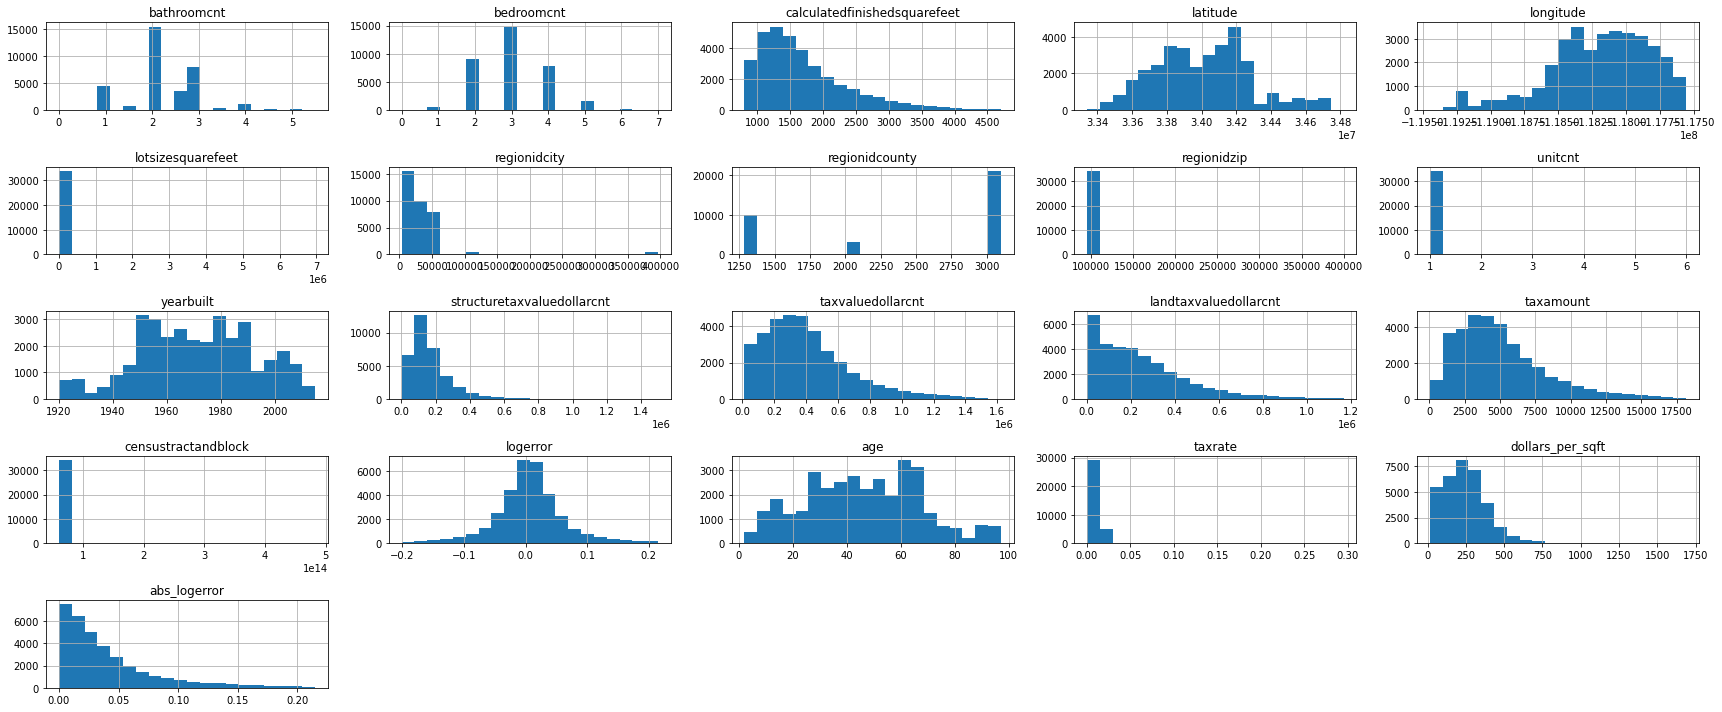

In [12]:
train.hist(figsize = (24,10), bins = 20)
plt.tight_layout()

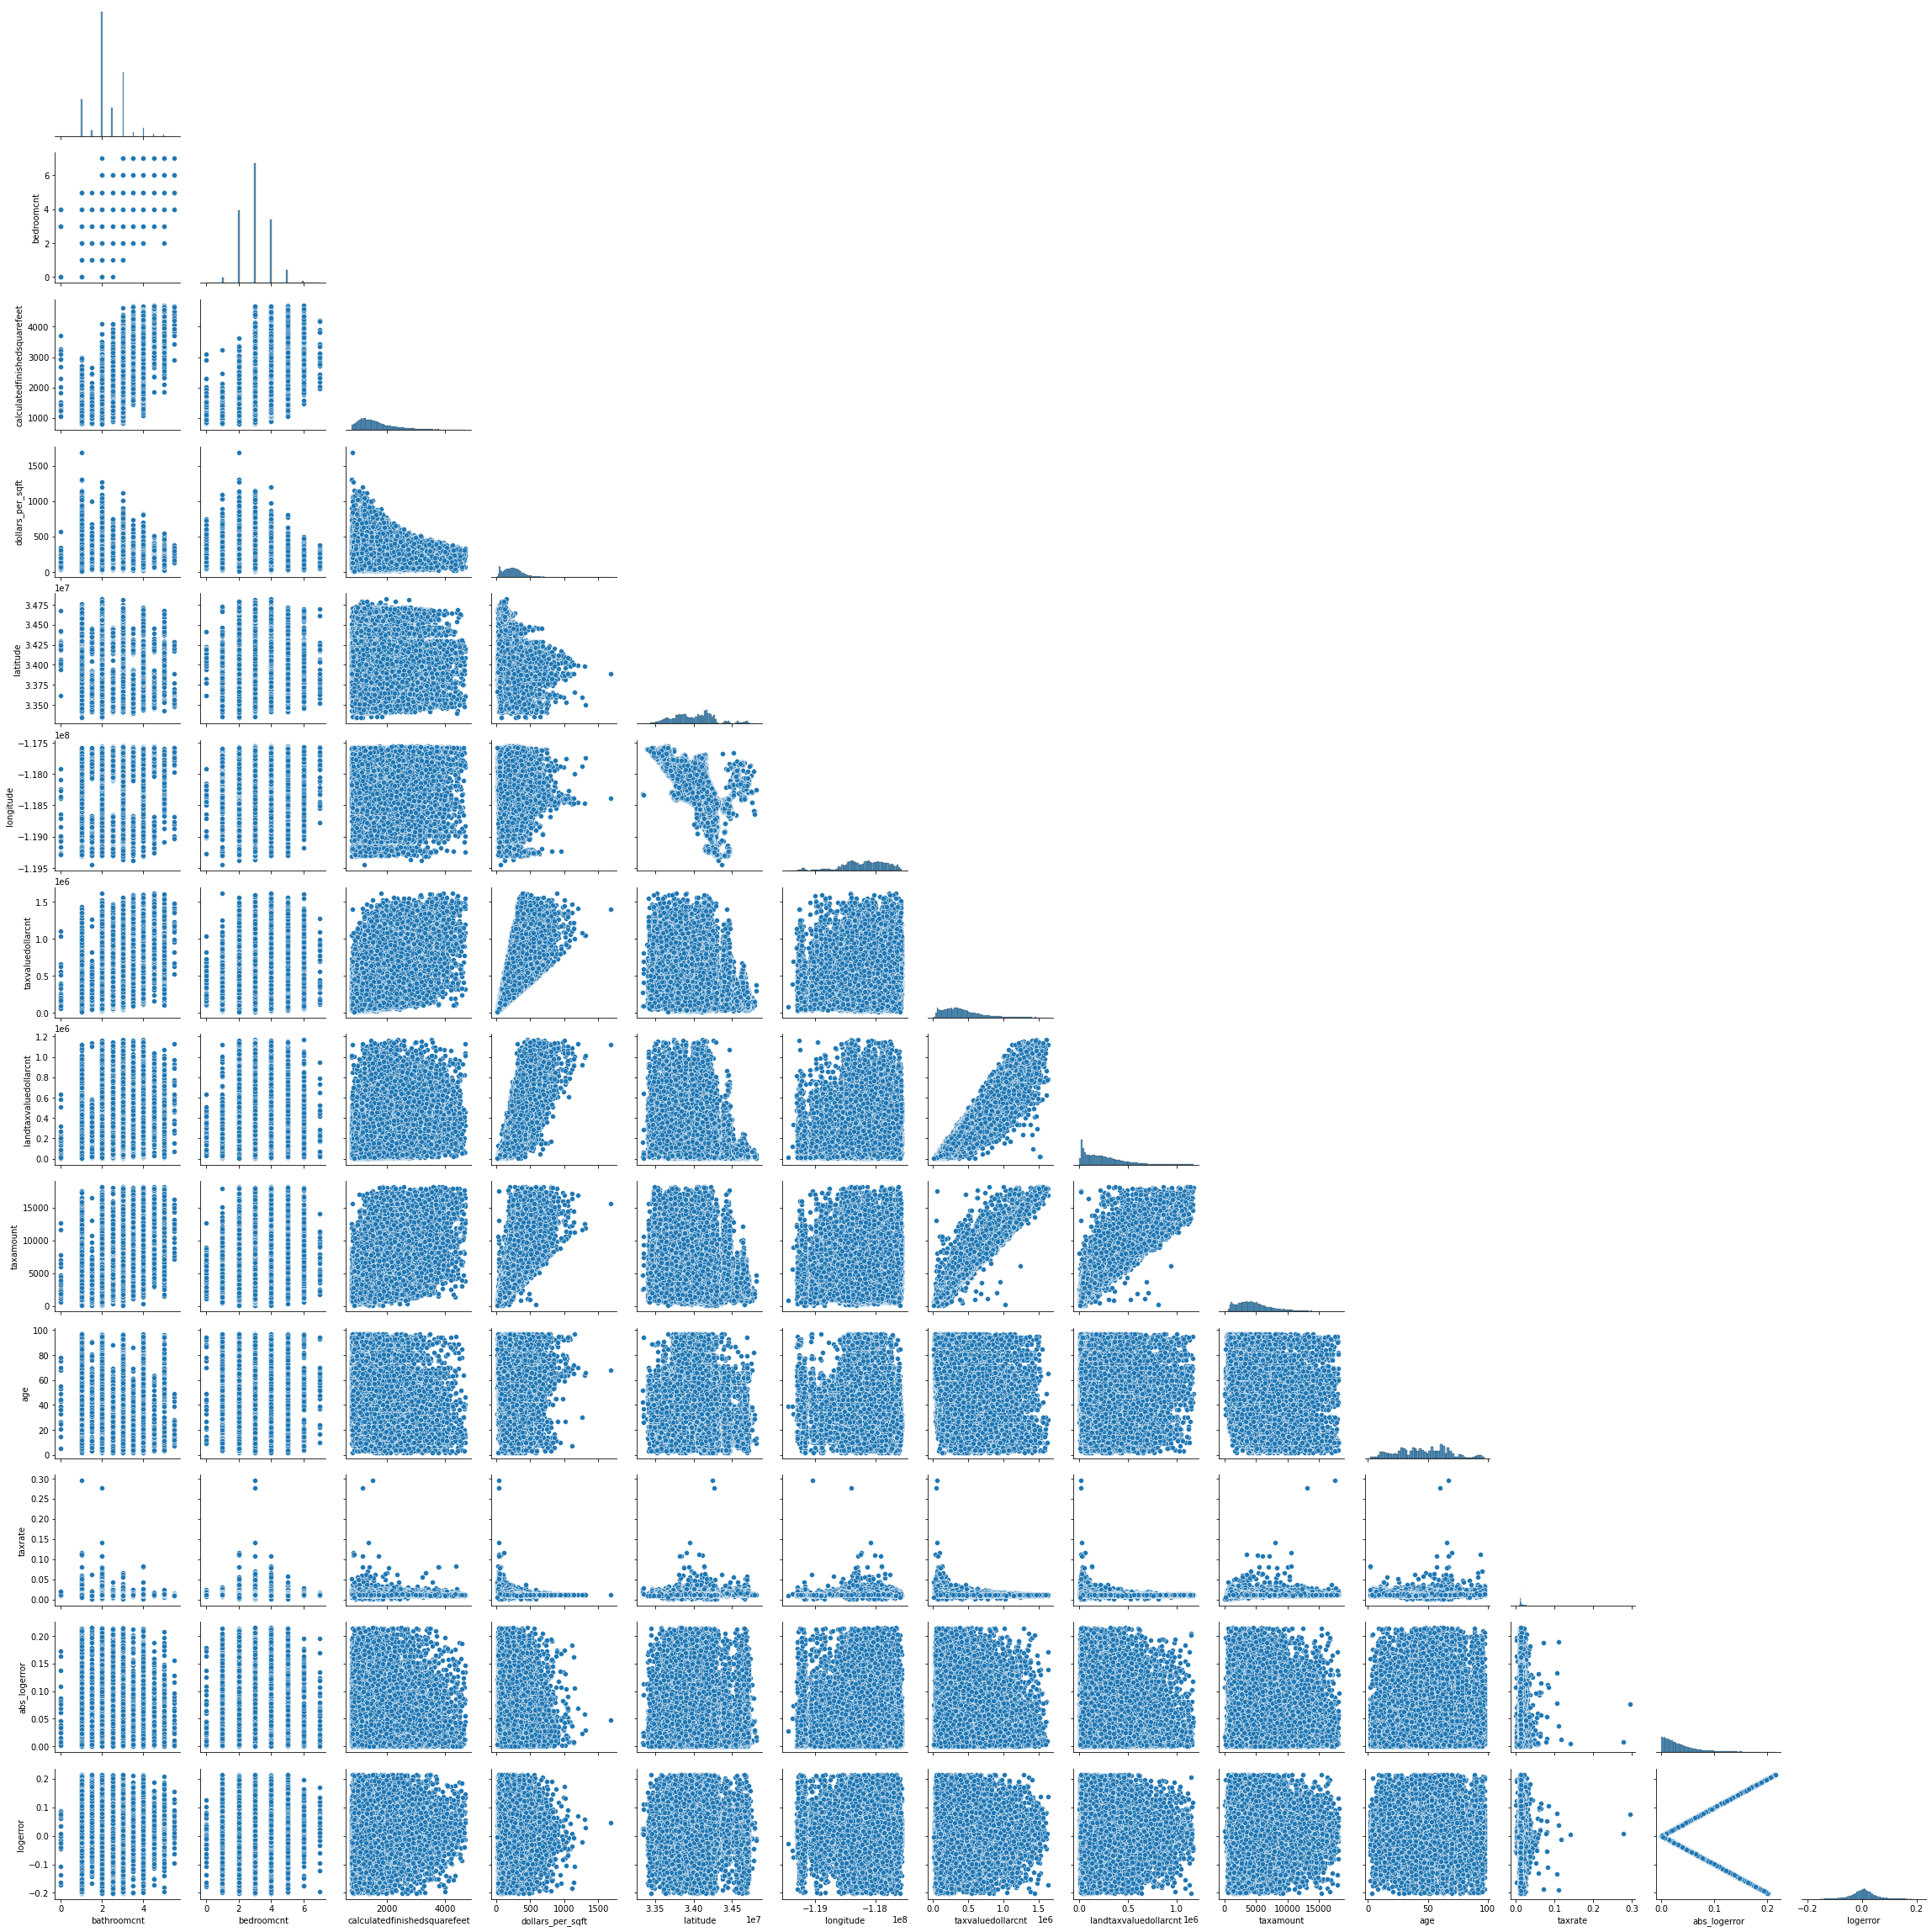

In [13]:
col_list = variables
col_list.append(target)

sns.pairplot(data = train[col_list], corner=True)

#### Takeaway
- squarefeet has more error under about 3k
- latitude and longitutde are all over the place with logerror
- age is all over the place as well



In [14]:


df_corr = train.corr().reset_index()
corr_matrix = train.corr().sort_values(by = 'logerror', ascending=False)
corr_matrix["logerror"].reset_index().style.background_gradient('gist_earth', vmin = -1, vmax = 1)
            

In [15]:
def plot_against_target(df, target, var_list, figsize = (10,5), hue = None):
    '''
    Takes in dataframe, target and varialbe list, and plots against target. 
    '''
    for var in var_list:
        plt.figure(figsize = (figsize))
        sns.regplot(data = df, x = var, y = target, 
                    line_kws={'color': 'red'})
        plt.show()

#### Takeaways

- When taxrate is high, logerror is under guessing
- when taxrate is low, more homes seem to be under guessed
- Also not very much other info gleaned from this

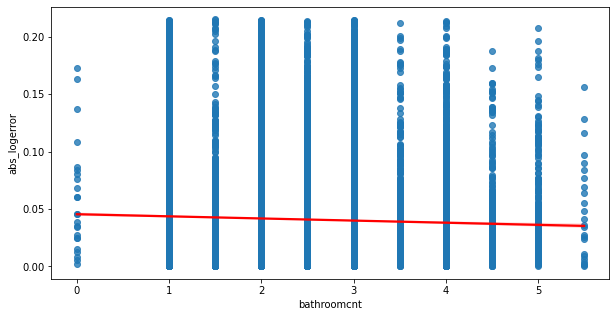

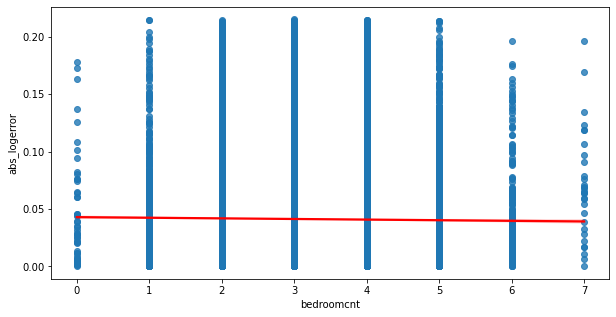

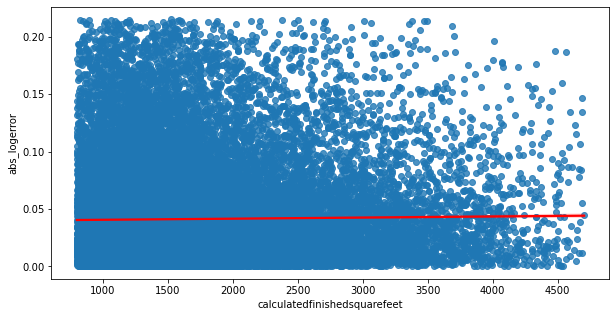

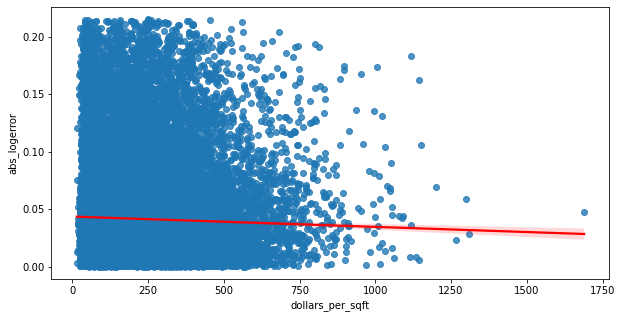

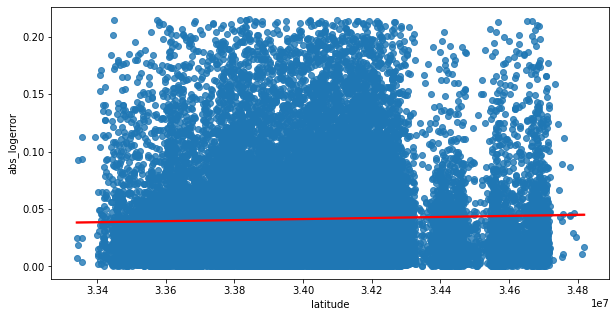

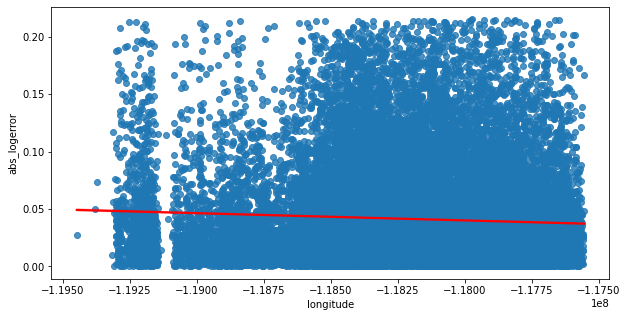

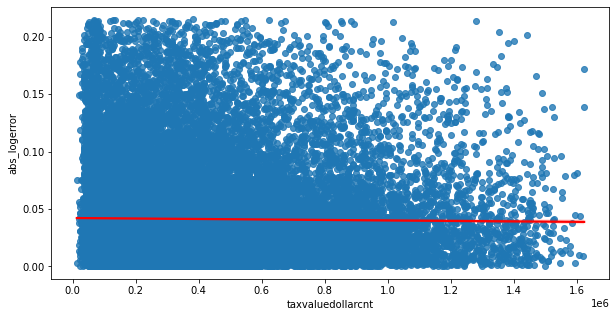

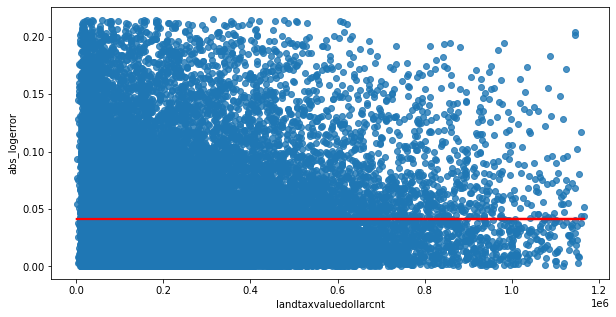

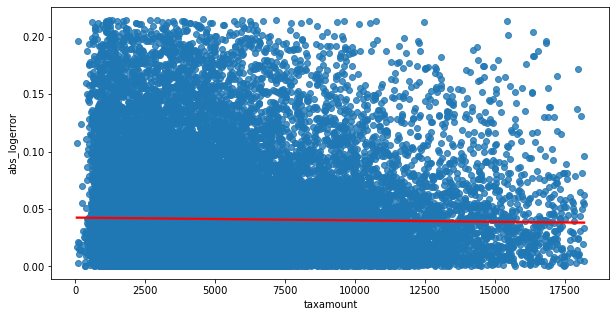

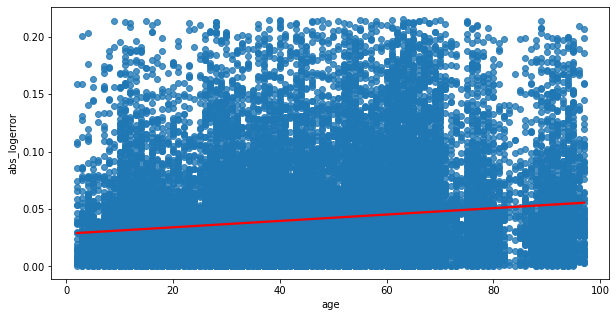

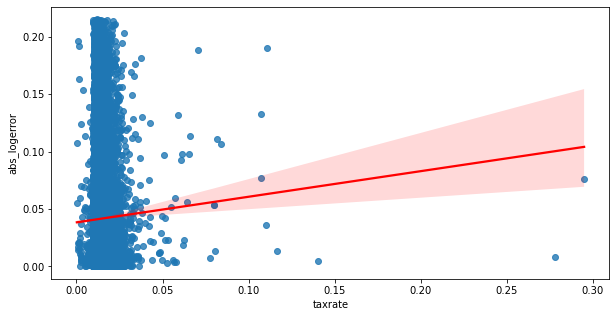

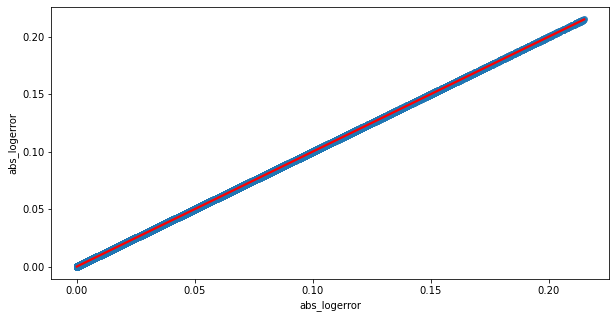

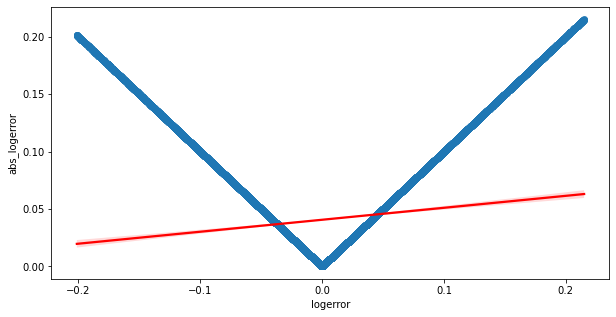

In [16]:
plot_against_target(train, target2 , variables)

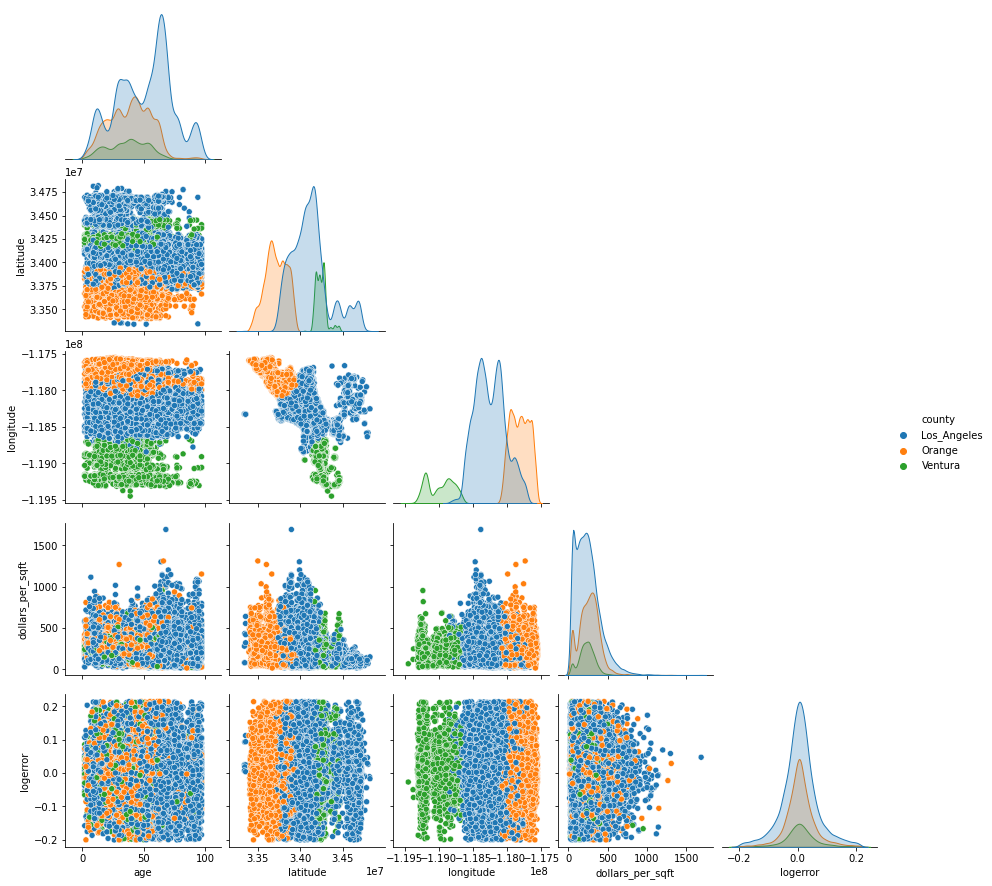

In [17]:
cols = [ 'age', 'latitude', 'longitude', 'dollars_per_sqft', 'logerror', 'county']

sns.pairplot(data = train[cols], hue = 'county', corner = True)

## Questions
- dollars_per_sqft affect logerror?
- county and logerror?
- age and logerror?
- does latitude/longitude affect logerror?


# Does logerror change based on county?

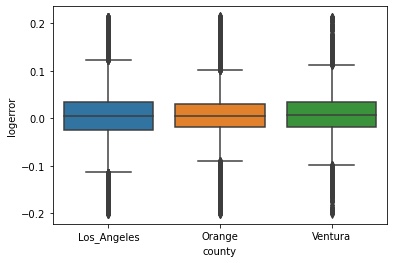

In [18]:
sns.boxplot(train.county, train.logerror,)
plt.show()

In [19]:
train.groupby('county').logerror.mean()

county
Los_Angeles    0.005353
Orange         0.007571
Ventura        0.008981
Name: logerror, dtype: float64

In [20]:
train.logerror.mean()

0.006331022570564957

<AxesSubplot:>

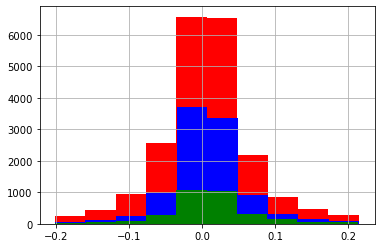

In [21]:
ax = train[train.county == 'Los_Angeles'].logerror.hist(color = 'red')
train[train.county == 'Orange'].logerror.hist(ax = ax, color = 'blue')
train[train.county == 'Ventura'].logerror.hist(ax = ax, color = 'green')

In [22]:
train.groupby('county').logerror.describe()

count      mean       std       min       25%       50%  \
county                                                                   
Los_Angeles  21102.0  0.005353  0.060837 -0.201253 -0.024914  0.005591   
Orange        9987.0  0.007571  0.051749 -0.201121 -0.017561  0.006003   
Ventura       3115.0  0.008981  0.056242 -0.200692 -0.018662  0.006868   

                  75%       max  
county                           
Los_Angeles  0.034348  0.214434  
Orange       0.030079  0.215061  
Ventura      0.034073  0.213227

#### Takeaways
- Most houses in order by county are LA, Orange, Ventura
- 50% values are very similar, lower 25%/upper 75% is where LA stands apart

### Hypothesis/Stats
- Null: Median logerror of LA county == median logerror
- Alternative: Median logerror of LA != median logerror

In [23]:
alpha = .05

t, p = stats.ttest_1samp(train[train.county == 'Orange'].logerror, train['logerror'].median() )

t, p 

(3.314153059394819, 0.0009224840416609692)

- P is less than our alpha, we can reject the null hypothesis and see that logerror will vary from county to county
- WIth a positive t value we can assume that median logerror may be higher with this group

# How does age affect logerror?

In [24]:
print(f'Mean logerror:    {train.logerror.mean()}')
print(f'Median logerror:  {train.logerror.median()}')

Mean logerror:    0.006331022570564957
Median logerror:  0.00585512021372


In [25]:
train.age.describe()

count    34204.000000
mean        46.000819
std         21.340919
min          2.000000
25%         30.000000
50%         45.000000
75%         62.000000
max         97.000000
Name: age, dtype: float64

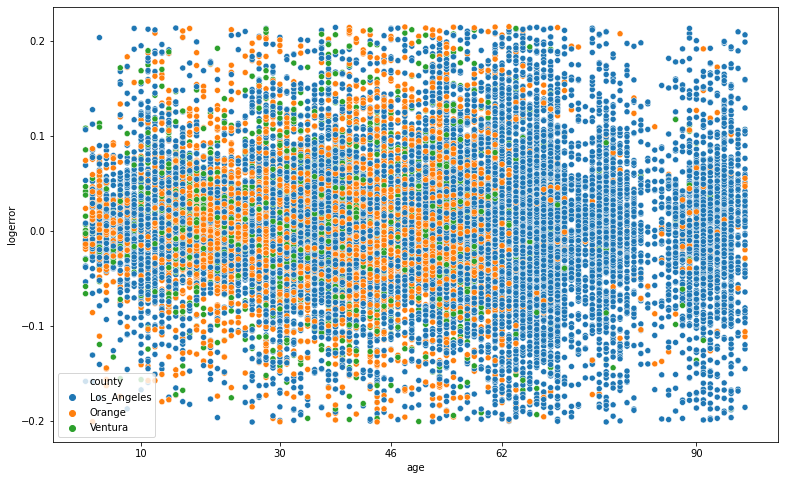

In [26]:
plt.figure(figsize = (13,8))
sns.scatterplot(train.age, train.logerror, hue =train.county)
plt.xticks(ticks =(10, 30, 46, 62, 90))
plt.show()

#### Takeaway
- not too much to takeaway from logerror and mean prediction
- is interesting to see where the counties fall as far as age range

### Hypothesis/Stats
Null: There is no linear correlation between age and logerror

Alternative: There is a linear correlation between age and logerror

In [27]:
alpha = 0.05

#test = independent T-Test

r, p = stats.pearsonr(train['age'], train['logerror'])
print(f't = {r}, p = {p}')

t = -0.032118838791157664, p = 2.8246425755225112e-09


- p is less than our alpha, we can reject the null hypothesis
- There is evidence that a linear correlation between age and logerror is statistically significant

# How does square foot of house affect logerror

In [28]:
train.calculatedfinishedsquarefeet.describe()

count    34204.000000
mean      1701.018828
std        687.151484
min        801.000000
25%       1200.000000
50%       1524.500000
75%       2020.000000
max       4703.000000
Name: calculatedfinishedsquarefeet, dtype: float64

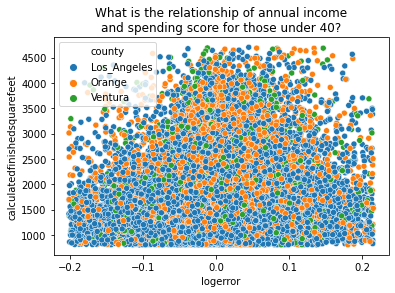

In [29]:
# visualize logerror and lotsize while controlling for newer age
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet', 
                data=train, hue = 'county')

plt.title("What is the relationship of annual income\nand spending score for those under 40?")
plt.show()

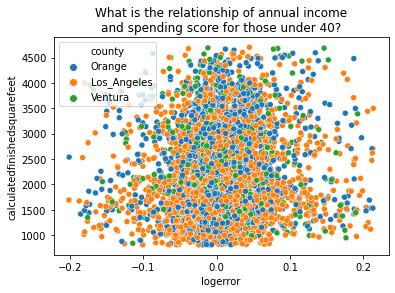

In [30]:
# # visualize logerror and lotsize while controlling for newer age
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet', 
                data = train[train.age <=26], hue = 'county',)

plt.title("What is the relationship of annual income\nand spending score for those under 40?")
plt.show()

### Hypothesis/Stats
H0: There is no linear correlation between home sqft and absolute logerror

Ha:There is a linear correlation between homesqft and absolute logerror

In [31]:
alpha = 0.05

#test = Pearson r

r, p = stats.pearsonr(train['calculatedfinishedsquarefeet'], train['logerror'])
print(f't = {r}, p = {p}')

t = 0.07536355463662836, p = 2.8390495242002787e-44


- p is less than alpha, we can reject the null hypothesis
- we can assume there is a linear correlation with sqft and logerror

### logerror baseline

In [32]:
# which value is lowest for the target 

train.logerror.mean(), train.logerror.median()

(0.006331022570564957, 0.00585512021372)

In [33]:
def get_median_baseline(train, validate, test):
    '''
    function takes in train validate test.
    Adds column with the baseline predictions based on the mean of train to each dataframe.
    returns train, validate, test
    '''
    train['baseline'] = train.logerror.median()
    validate['baseline'] = train.logerror.median()
    test['baseline'] = train.logerror.median()
    
    return train, validate, test

In [34]:
train, validate, test = get_median_baseline(train, validate, test)
train.baseline.value_counts()

0.005855    34204
Name: baseline, dtype: int64

# Does latitude / longitude affect logerror

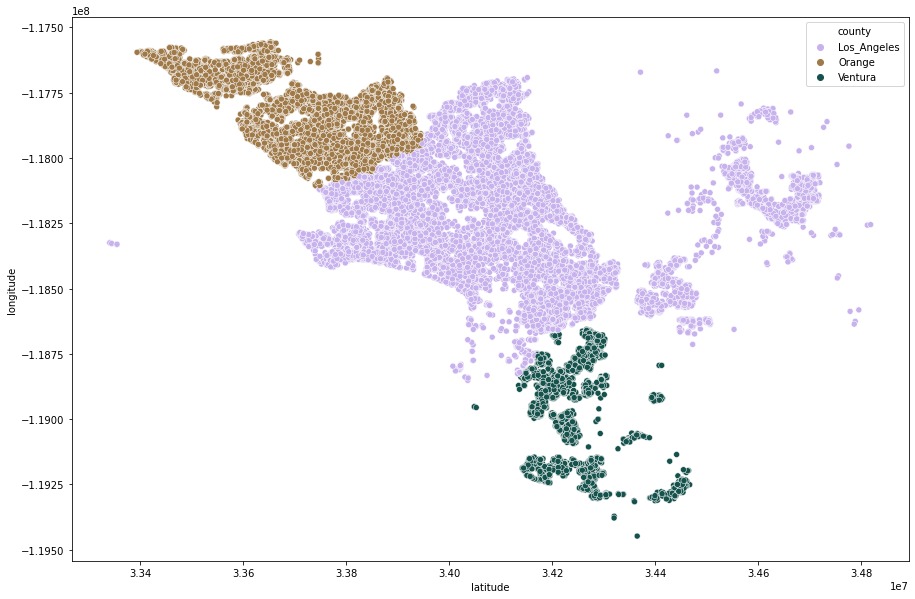

In [35]:
plt.figure(figsize = (15,10))
sns.scatterplot(x='latitude', y ='longitude', data = train, hue = 'county', palette = 'cubehelix_r')
plt.show()

In [36]:
def scale_this(X_data, scalertype):
    '''
    X_data = dataframe with specified columns 
    scalertype = either StandardScaler() or MinMaxScaler()
    This function takes a dataframe (X_data), a scaler, and ouputs a new dataframe with those columns scaled. 
    And a scaler for inverse transformation
    '''
    scaler = scalertype.fit(X_data)

    X_scaled = pd.DataFrame(scaler.transform(X_data), columns = X_data.columns).set_index([X_data.index.values])
    
    return X_scaled, scaler

In [44]:
# set up columns for cluster
X_train = train[['age', 'latitude', 'longitude']]
# scale columns
X_train_scaled, minmax_scaler = scale_this(X_train, MinMaxScaler())

In [45]:
X_train_scaled.head()

age  latitude  longitude
34423  0.557895  0.521163   0.900139
31856  0.136842  0.178461   0.833424
59878  0.284211  0.583281   0.245729
26590  0.568421  0.536971   0.521556
6289   0.442105  0.456098   0.511444

In [42]:
def create_clusters(X_data, k, col_name = None ):
    '''
    Function takes in scaled dataframe, k (number of clusters desired)
    Optional arguemenet col_name, If none is entered column returned is {k}_k_clusters
    Returns dataframe with column attached and dataframe with centroids (scaled) in it
    Returns: X_data, centroids_scaled, kmeans
    Use for exploring and when you need centroids
    '''
    
    # make thing
    kmeans = KMeans(n_clusters=k, random_state=123)

    # Fit Thing
    kmeans.fit(X_data)
    
    # create clusters
    centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = list(X_data))
    
    if col_name == None:
    #clusters on dataframe 
        X_data['clusters'] = kmeans.predict(X_data)
        X_data.clusters = X_data.clusters.astype('category')
    else:
        X_data[col_name] = kmeans.predict(X_data)
        X_data[col_name] = X_data[col_name].astype('category')
    
    return X_data, centroids_scaled, kmeans

In [43]:
X_train_scaled, centroids_scaled, kmeans = create_clusters(X_train_scaled, 4,  col_name = 'lat_long_age_cluster')

In [ ]:
train['lat_long_age_cluster'] = X_train_scaled['lat_long_age_cluster']
validate['lat_long_age_cluster'] = X_train_scaled['lat_long_age_cluster']
test['lat_long_age_cluster'] = X_train_scaled['lat_long_age_cluster']

In [ ]:
def scatterplot_clusters(x ,y, cluster_col_name, df , kmeans, scaler, centroids):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""

    # set figsize
    plt.figure(figsize=(10, 6))
    
    # scatterplot the clusters 
    sns.scatterplot(x = x, y = y, data = df, hue = cluster_col_name, palette = 'cubehelix_r')
    
    # plot the centroids as Xs
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.60, s=500, c='black', marker = 'x')



### Cluster 1 [ latitude, longitude ]

In [ ]:
scatterplot_clusters('latitude', 'longitude', 'lat_long_age_cluster', X_train_scaled, kmeans, minmax_scaler, centroids_scaled)
plt.title('4 Clusters with Location and Age')
plt.show()

In [ ]:
# One column per latitude
# One color/shape for each cluster label
sns.relplot('latitude', 'longitude', 'lat_long_age_cluster', col = 'lat_long_age_cluster', data=X_train_scaled, palette = 'cubehelix_r')
plt.show()

### Cluster [ age, latitude, longitude ]

In [ ]:
scatterplot_clusters('age', 'latitude', 'lat_long_age_cluster', X_train_scaled, kmeans, minmax_scaler, centroids_scaled)
plt.title('4 Clusters with Location and Age')
plt.show()

In [ ]:
# One column per age
# One color/shape for each cluster label
sns.relplot('age', 'latitude','lat_long_age_cluster', col='lat_long_age_cluster', data=X_train_scaled, palette = 'cubehelix_r')

In [ ]:
scatterplot_clusters('age', 'longitude', 'lat_long_age_cluster', X_train_scaled, kmeans, minmax_scaler, centroids_scaled)
plt.title('4 Clusters with Location and Age')
plt.show()

In [ ]:
# One column per age
# One color/shape for each cluster label
sns.relplot('age', 'longitude', 'lat_long_age_cluster', col="lat_long_age_cluster", data=X_train_scaled, palette = 'cubehelix_r')
plt.show()

In [ ]:
def plot_inertia(X_data, k_range_start = 1, k_range_end = 10):
    '''
    This function takes in a dataframe (must be scaled)
    Plots the change in inertia with 'x' markers
    Optional argument to adjust the range, default range(2,10)
    '''
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(10, 7))
        pd.Series({k: KMeans(k).fit(X_data).inertia_ for k in range(k_range_start, k_range_end)}).plot(marker='x')
        plt.xticks(range(k_range_start -1, k_range_end))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')

In [ ]:
plot_inertia(X_train_scaled, k_range_end = 15)

In [ ]:
# set up columns for cluster
X_train = train[['calculatedfinishedsquarefeet', 'age' , 'dollars_per_sqft']]
# scale columns
X_train_scaled, minmax_scaler = scale_this(X_train, MinMaxScaler())

In [ ]:
plot_inertia(X_train_scaled, k_range_end = 15)

In [ ]:
# create cluster with n = 6
X_train_scaled, centroids_scaled, kmeans = create_clusters(X_train_scaled, 6, 'age_sqft_cluster')
scatterplot_clusters('calculatedfinishedsquarefeet', 'age', 'age_sqft_cluster', X_train_scaled, kmeans, minmax_scaler, centroids_scaled)

plt.title("Location clusters with their Centroids")
plt.show()

In [ ]:
X_train_scaled.dtypes

In [ ]:
train['age_sqft_cluster'] = X_train_scaled['age_sqft_cluster']
validate['age_sqft_cluster'] = X_train_scaled['age_sqft_cluster']
test['age_sqft_cluster'] = X_train_scaled['age_sqft_cluster']
train.head()

## Clusters need to to be encoded for model performance

In [ ]:
#train['lat_long_age_cluster'] = X_train_scaled['lat_long_age_cluster']
train.head()

In [ ]:
#create a list of columns
list_cluster = train.columns.to_list()
#get only clusters columns
cat_var = list_cluster[-2:]


In [ ]:
cat_var

In [ ]:
#train
dummies =  pd.get_dummies(train[cat_var])
train = pd.concat([train, dummies], axis=1)
train = train.drop(columns=cat_var)

#validate
dummies =  pd.get_dummies(validate[cat_var])
validate = pd.concat([validate, dummies], axis=1)
validate = validate.drop(columns=cat_var)

#test
dummies =  pd.get_dummies(test[cat_var])
test = pd.concat([test, dummies], axis=1)
test = test.drop(columns=cat_var)

In [ ]:
train.head()

In [ ]:
def get_X_train_y_train(X_cols, y_col, train, validate, test):
    '''
    X_cols = list of column names you want as your features
    y_col = string that is the name of your target column
    train = the name of your train dataframe
    validate = the name of your validate dataframe
    test = the name of your test dataframe
    outputs X_train and y_train, X_validate and y_validate, and X_test and y_test
    6 variables come out! So have that ready
    '''
    
    # do the capital X lowercase y thing for train test and split
    # X is the data frame of the features, y is a series of the target
    X_train, y_train = train[X_cols], train[y_col]
    X_validate, y_validate = validate[X_cols], validate[y_col]
    X_test, y_test = test[X_cols], test[y_col]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
X_cols = list(train.drop(columns = ['abs_logerror', 'logerror', 'baseline']))
y_col = 'logerror'

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = get_X_train_y_train(X_cols, y_col, train, validate, test)

In [ ]:
X_train.head()

# Fresh Start - Applying Magic

In [ ]:
train, validate, test, scaler = wrangle.some_magic()

In [ ]:
train.shape, validate.shape, test.shape

In [ ]:
# create heatmap with scaled data
plt.figure(figsize=(8,12))
value_heatmap = sns.heatmap(train.corr()[['logerror']].sort_values(by='logerror', ascending=True), 
                            cmap='plasma_r', vmin=-.5, vmax=.5, annot=True)
value_heatmap.set_title('Feautures Correlating with Absolute Logerror')
plt.show()

## Cluster stats testing

- H0: Median absolute logerror of lat_long_age_cluster_1 == median absolute logerror
- HA: Median absoloute logerror of lat_long_age_cluster_1 != median absolut logerror

In [ ]:
alpha = .05

t, p = stats.ttest_1samp(train[train.lat_long_age_cluster_1 == 1].logerror, train['logerror'].median())
t, p 

- P value of 0 means we can reject the null hypothesis
- Positive t might be evidence that median error is higher with this group.

#### Check another
- lat_long_age_cluster_3

In [ ]:
alpha = .05

t, p = stats.ttest_1samp(train[train.lat_long_age_cluster_3 == 1].abs_logerror, train['logerror'].median())
t, p 

## Median Baseline

In [ ]:
train, validate, test = wrangle.get_median_baseline(train, validate, test)
train.baseline.median()

In [ ]:
train.logerror.median(), train.logerror.mean()

In [ ]:
X_cols = list(train.drop(columns = ['abs_logerror', 'logerror', 'baseline', 'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc']))
y_col = 'logerror'

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.get_X_train_y_train(X_cols, y_col, train, validate, test)


In [ ]:
X_test.head()

# Modeling
### LinerarRegression OLM

In [ ]:
model= LinearRegression()
model_name = 'olm_1'

# fit model
model.fit(train[X_cols], train[y_col])
    
# put predictions in train dataframe
train[model_name] = model.predict(train[X_cols])
#put predictions in validate dataframe
validate[model_name] = model.predict(validate[X_cols])
    
# print confirmation 
print(f'{model_name} has been created and added to train and validate dataframes\n')

In [ ]:
# calculate model RMSE
model_name = 'olm_1'
rmse = mean_squared_error(train[model_name], y_train, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(train['baseline'], y_train, squared = False)
    
# print it all out
print(f'''------- {'train'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

In [ ]:
# calculate model RMSE
model_name = 'olm_1'
rmse = mean_squared_error(validate[model_name], y_validate, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(validate['baseline'], y_validate, squared = False)
    
# print it all out
print(f'''------- {'validate'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

### LassoLars

In [ ]:
model= LassoLars(alpha =1.0)
model_name = 'lars_1'

# fit model
model.fit(train[X_cols], train[y_col])
    
# put predictions in train dataframe
train[model_name] = model.predict(train[X_cols])
#put predictions in validate dataframe
validate[model_name] = model.predict(validate[X_cols])
    
# print confirmation 
print(f'{model_name} has been created and added to train and validate dataframes\n')

In [ ]:
# calculate model RMSE
model_name = 'lars_1'
rmse = mean_squared_error(train[model_name], y_train, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(train['baseline'], y_train, squared = False)
    
# print it all out
print(f'''------- {'train'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

In [ ]:
# calculate model RMSE
model_name = 'lars_1'
rmse = mean_squared_error(validate[model_name], y_validate, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(validate['baseline'], y_validate, squared = False)
    
# print it all out
print(f'''------- {'validate'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

### TweedieRegressor

In [ ]:
model= TweedieRegressor(power =1.0, alpha = 0.0)
model_name = 'glm_1'

# fit model
model.fit(train[X_cols], train[y_col])
    
# put predictions in train dataframe
train[model_name] = model.predict(train[X_cols])
#put predictions in validate dataframe
validate[model_name] = model.predict(validate[X_cols])
    
# print confirmation 
print(f'{model_name} has been created and added to train and validate dataframes\n')

In [ ]:
# calculate model RMSE
model_name = 'glm_1'
rmse = mean_squared_error(train[model_name], y_train, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(train['baseline'], y_train, squared = False)
    
# print it all out
print(f'''------- {'train'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

In [ ]:
# calculate model RMSE
model_name = 'glm_1'
rmse = mean_squared_error(validate[model_name], y_validate, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(validate['baseline'], y_validate, squared = False)
    
# print it all out
print(f'''------- {'validate'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

## Controlling for LA county and other

In [ ]:
# Create function to do seperate dataframes for old and new
def location_location(df):
    '''
    '''
    # old
    df_LA = df[df['county_Los_Angeles'] == 1]
    
    # new
    df_not_LA = df[df['county_Los_Angeles'] == 0]
    
    return df_LA, df_not_LA

In [ ]:
train_LA, train_not_LA = location_location(train)

validate_LA, validate_not_LA = location_location(validate)

test_LA, test_not_LA = location_location(test)

In [ ]:
train_LA.shape, train_not_LA.shape

In [ ]:
X_train_LA, y_train_LA, X_validate_LA, y_validate_LA, X_test_LA, y_test_LA = wrangle.get_X_train_y_train(X_cols, y_col, train_LA, validate_LA, test_LA)

X_train_not_LA, y_train_not_LA, X_validate_not_LA, y_validate_not_LA, X_test_not_LA, y_test_not_LA = wrangle.get_X_train_y_train(X_cols, y_col, train_not_LA, validate_not_LA, test_not_LA)

## LA COUNTY

In [ ]:
model= LinearRegression()
model_name = 'olm_2'

# fit model
model.fit(train_LA[X_cols], train_LA[y_col])
    
# put predictions in train dataframe
train_LA[model_name] = model.predict(train_LA[X_cols])
#put predictions in validate dataframe
validate_LA[model_name] = model.predict(validate_LA[X_cols])
    
# print confirmation 
print(f'{model_name} has been created and added to train_LA and validate_LA dataframes\n')

In [ ]:
# calculate model RMSE
model_name = 'olm_2'
rmse = mean_squared_error(train_LA[model_name], y_train_LA, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(train_LA['baseline'], y_train_LA, squared = False)
    
# print it all out
print(f'''------- {'train_LA'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

In [ ]:
# calculate model RMSE
model_name = 'olm_2'
rmse = mean_squared_error(validate_LA[model_name], y_validate_LA, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(validate_LA['baseline'], y_validate_LA, squared = False)
    
# print it all out
print(f'''------- {'validate_LA'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

## NOT LA COUNTY

In [ ]:
model= LinearRegression()
model_name = 'olm_3'

# fit model
model.fit(train_not_LA[X_cols], train_not_LA[y_col])
    
# put predictions in train dataframe
train_not_LA[model_name] = model.predict(train_not_LA[X_cols])
#put predictions in validate dataframe
validate_not_LA[model_name] = model.predict(validate_not_LA[X_cols])
    
# print confirmation 
print(f'{model_name} has been created and added to train_LA and validate_LA dataframes\n')

In [ ]:
# calculate model RMSE
model_name = 'olm_3'
rmse = mean_squared_error(train_not_LA[model_name], y_train_not_LA, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(train_not_LA['baseline'], y_train_not_LA, squared = False)
    
# print it all out
print(f'''------- {'train_not_LA'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

In [ ]:
# calculate model RMSE
model_name = 'olm_3'
rmse = mean_squared_error(validate_not_LA[model_name], y_validate_not_LA, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(validate_not_LA['baseline'], y_validate_not_LA, squared = False)
    
# print it all out
print(f'''------- {'validate_not_LA'} ---------\n
RMSE for {model_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

## Takeaways
- controlling for Los Angeles county proved to be better for minimizing logerror 
- LA county has a higher absolute logerror than the other counties

- While outside counties had a lower median logerror the modes did still perform better

In [ ]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(15,7))
plt.hist(validate['logerror'], color='blue', alpha=.5, label="Actual ABS Logerror", 
         bins=[0, .1, .2, .3, .4, .5, .6, .7, .8])
plt.hist(validate['baseline'], color='orange', alpha=.5, label="Baseline Model")
plt.hist(validate['olm_1'], color='red', alpha=.5, label="Model: LinearRegression")
#plt.hist(validate['glm_1'], color='purple', alpha=.5, label="Model: TweedieRegressor")
plt.hist(validate_LA['olm_2'], color='green', alpha=.5, label="Model: LinearRegression")
#plt.hist(validate_not_LA['olm_3'], color='green', alpha=.5, label="Model: LinearRegression")
plt.suptitle("Comparison of the models using all the features", fontsize = 15)
plt.title("Only showing error between (0 - 1.5)")
plt.xlabel("Log Error")
plt.ylabel("Number of Homes in LogError Range")
plt.xlim(left = 0, right = 1.5)
plt.legend()
plt.show()

### Takeaways

- All models performed better than the baseline
- The improvement was better but not by much, my top two performers were
    - LinearRegression olm_1: 
    Better than baseline by: 0.012183191073234595
    - LinearRegression olm_3:
    Better than baseline by: 0.015544305995229879


In [ ]:
#fit model
model = LinearRegression()
model_name = 'olm_1'
model.fit(train[X_cols], train[y_col])
    
#put predictions in train dataframe
train[model_name] = model.predict(train[X_cols])
    
#put predictions in validate dataframe
validate[model_name] = model.predict(validate[X_cols])
    
test[model_name] = model.predict(test[X_cols])
    
#print confirmation instead of returning something
print(f'{model_name} has been created and added to train and validate dataframes\n')
    
# compare the RMSEs (this function prints out RMSE comparisons 

trmse = mean_squared_error( train[model_name], train[y_col])
print(f'train rmse is: {rmse}')
vrmse = mean_squared_error( validate[model_name], validate[y_col])
print(f'validate rmse is: {rmse}')

In [ ]:
# calculate model RMSE
model_name = 'olm_1'
rmse = mean_squared_error(test[model_name], y_test, squared = False)
    
# calculate baseline RMSE 
rmse_b = mean_squared_error(test['baseline'], y_test, squared = False)
    
# print it all out
print(f'''------- {'test'} ---------\n
RMSE for {models_name}: {rmse}\n
RMSE for baseline: {rmse_b}\n
Better than baseline?: {rmse < rmse_b} by {rmse_b - rmse}
        ''')

# Conclussion
- All models performed better than the baseline
- cluster with latitude, longitude, and age brought some value for minimizing logerror
- Given more time
    - I would like to look deeper into other clusters with location and house size
    - explore modeling with polynomial regression 